<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_6_Estad%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 6**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: ESTADÍSTICA DESCRIPTIVA Y PROBABILIDAD
*   CARRERA: DATA SCIENCE

###Experimento:###
- Este conjunto de datos es un registro de las ventas en el mercado de 7 especies comunes de peces diferentes. Con este conjunto de datos, se busca realizar un modelo predictivo utilizando datos adecuados para máquinas y estimar el peso de los peces basándose en la longitud y ancho del pez.
- El conjunto de datos incluye información sobre varias dimensiones del pez, que se utilizan para predecir su peso. Cada fila en el conjunto de datos representa una entrada de un pez individual y contiene varias columnas con información relevante. Las dimensiones del pez y otros atributos en el conjunto de datos podrían incluir:
  - Species: La especie del pez.
  - Weight: El peso del pez, que es la variable que se intenta predecir.
  - Length1, Length2, Length3: Diferentes longitudes del pez.
  - Height: Altura del pez.
  - Width: Ancho del pez.
- Los datos en este archivo permiten realizar análisis estadísticos y modelado predictivo para determinar cómo las dimensiones del pez están relacionadas con su peso. Esto puede ser útil en la industria pesquera y en la investigación científica para comprender mejor las relaciones entre las características físicas de los peces y su peso. Para esto se te solicita:

In [25]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar los datos
data = pd.read_csv('Fish.csv')

In [26]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000




---



**Pregunta 1**
- Crea una nueva columna que incluya el volumen de pez, asumiéndolo como un cilindro. Para un cilindro con una base circular, el área de la base (A) es igual a πr², donde "r" es el radio de la base del cilindro, y la altura (h) es la distancia entre las dos bases circulares.

In [27]:
# 1. Crear una nueva columna para el volumen del pez
data['Volume'] = np.pi * ((data['Width'] / 2) ** 2) * data['Height']
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Volume
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,146.215854
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,181.707071
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,214.391723
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,198.477454
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,257.609344


---

**Pregunta 2**
- Verifica la correlación posible entre las variables, numérica y gráficamente. ¿Aumenta la correlación al añadir el volumen? Explica.

<ipython-input-28-0fb6c0d271e2>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


           Weight   Length1   Length2   Length3    Height     Width    Volume
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507  0.881981
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050  0.732409
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547  0.741313
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520  0.767774
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881  0.868256
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000  0.905626
Volume   0.881981  0.732409  0.741313  0.767774  0.868256  0.905626  1.000000


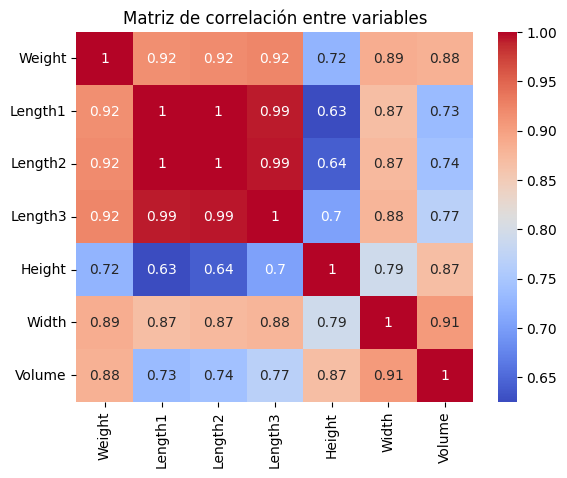

In [28]:
# 2. Verificar la correlación entre las variables
correlation_matrix = data.corr()
print(correlation_matrix)

# Gráfico de matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables')
plt.show()

**Conclusión**
- En mi opinión el agregar la columna Volumen no ha generado un mayor grado de correlación, de hecho los máximos de correlación no están en dicha columna.



---

**Pregunta 3**
- Construye un modelo de regresión lineal que relacione el volumen y el peso de los peces. Realiza una breve evaluación del modelo y grafícalo.

Mean Squared Error: 16163.837699070646
R-squared: 0.8863616511399243


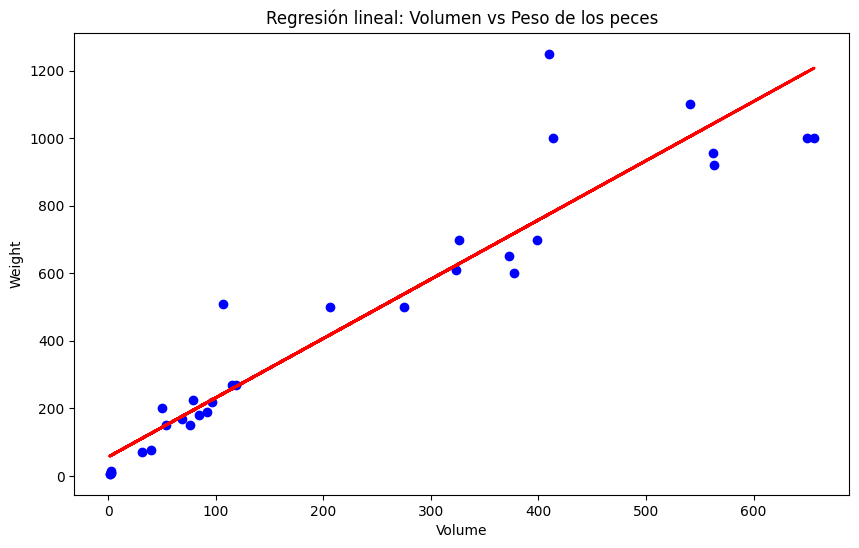

In [29]:
# 3. Construir un modelo de regresión lineal entre volumen y peso de los peces
X = data[['Volume']]
y = data['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluación del modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Gráfico del modelo
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel('Volume')
plt.ylabel('Weight')
plt.title('Regresión lineal: Volumen vs Peso de los peces')
plt.show()


---

**Pregunta 4**
- ¿Qué sucede si aplicas el modelo anterior por separado a cada especie de peces? Explica.


Species: Bream
Mean Squared Error: 5269.549726142482
R-squared: 0.837303212513165


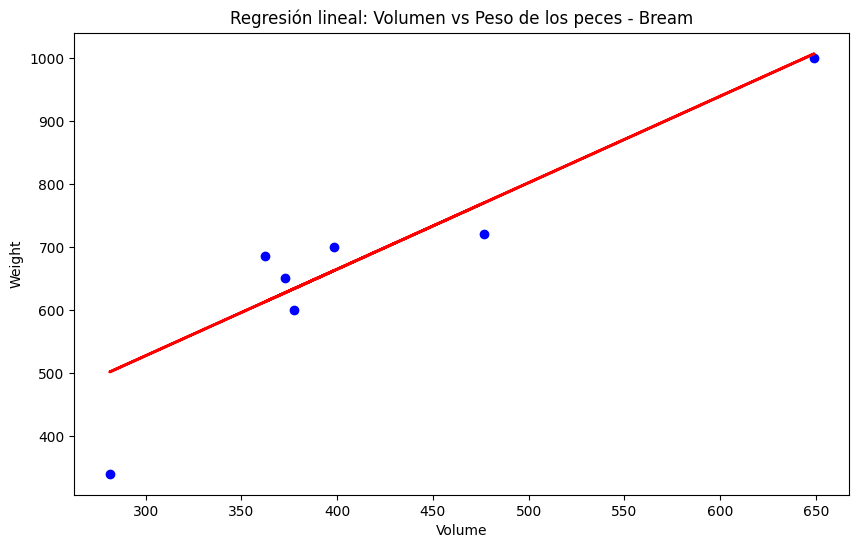


Species: Roach
Mean Squared Error: 221.52669340937288
R-squared: 0.9782607833850582


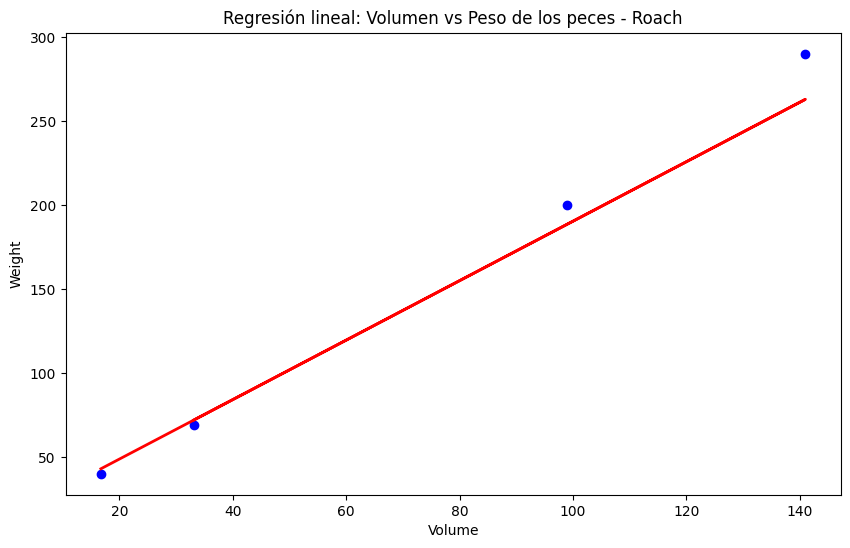


Species: Whitefish
Mean Squared Error: 5541.423289489816
R-squared: 0.0


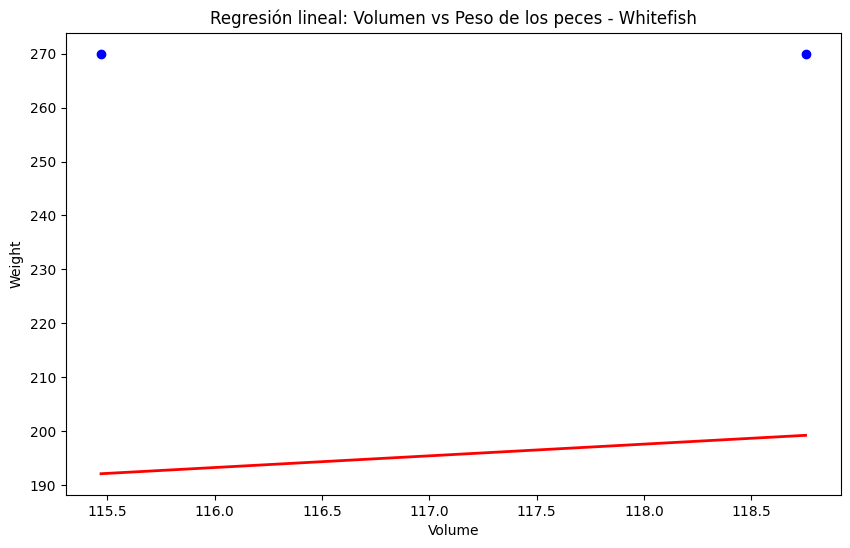


Species: Parkki
Mean Squared Error: 57.28368302184034
R-squared: 0.9928828357050642


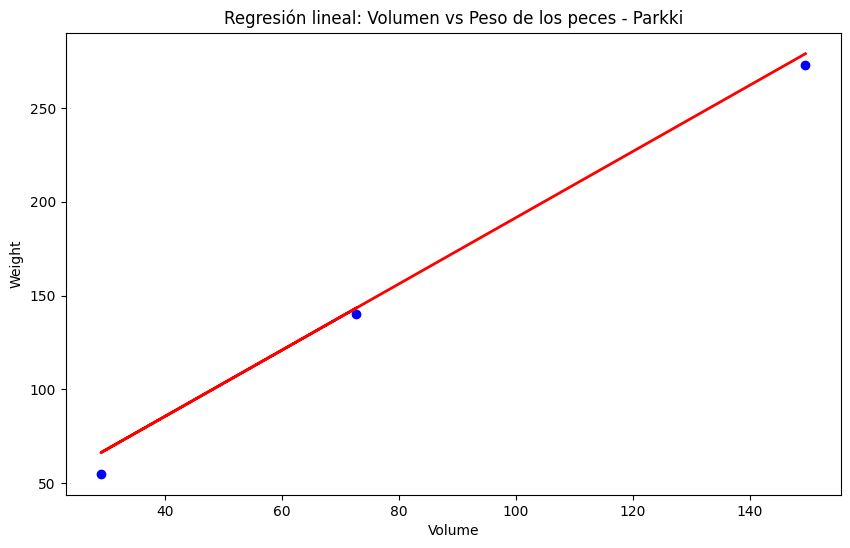


Species: Perch
Mean Squared Error: 4747.574895315513
R-squared: 0.9592421047814468


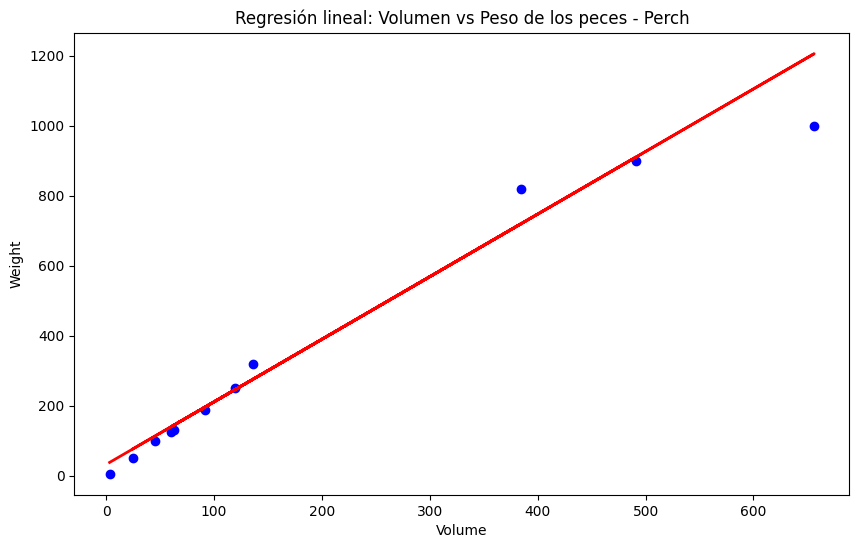


Species: Pike
Mean Squared Error: 62308.96407975739
R-squared: 0.7952919769662442


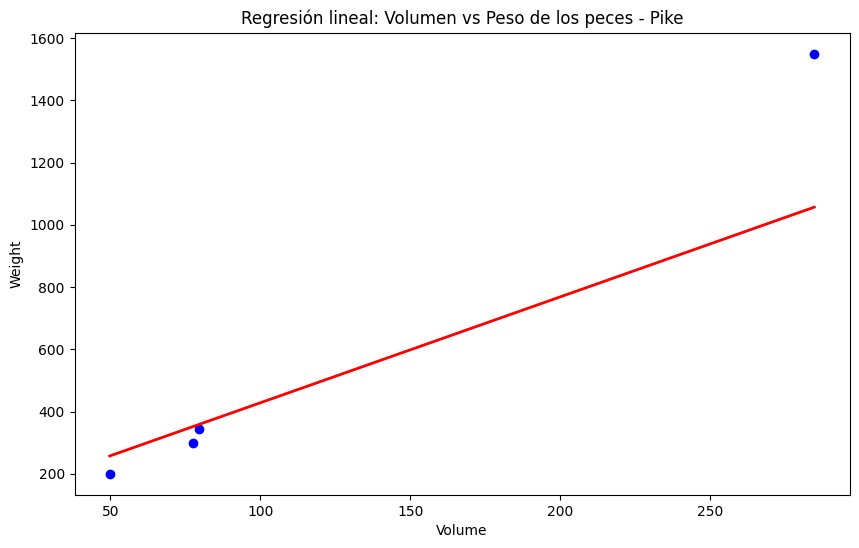


Species: Smelt
Mean Squared Error: 2.9782203057373806
R-squared: 0.5569589627828688


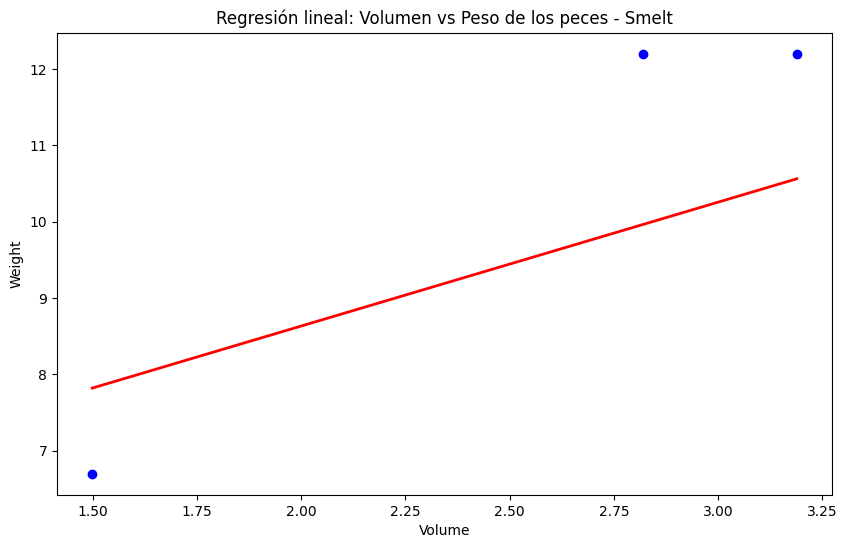

In [30]:
# 4. Aplicar el modelo por separado a cada especie de peces
species = data['Species'].unique()

for specie in species:
    specie_data = data[data['Species'] == specie]
    X_specie = specie_data[['Volume']]
    y_specie = specie_data['Weight']

    X_train_specie, X_test_specie, y_train_specie, y_test_specie = train_test_split(X_specie, y_specie, test_size=0.2, random_state=42)

    model_specie = LinearRegression()
    model_specie.fit(X_train_specie, y_train_specie)

    y_pred_specie = model_specie.predict(X_test_specie)
    mse_specie = mean_squared_error(y_test_specie, y_pred_specie)
    r2_specie = r2_score(y_test_specie, y_pred_specie)

    print(f'\nSpecies: {specie}')
    print(f'Mean Squared Error: {mse_specie}')
    print(f'R-squared: {r2_specie}')

    plt.figure(figsize=(10, 6))
    plt.scatter(X_test_specie, y_test_specie, color='blue')
    plt.plot(X_test_specie, y_pred_specie, color='red', linewidth=2)
    plt.xlabel('Volume')
    plt.ylabel('Weight')
    plt.title(f'Regresión lineal: Volumen vs Peso de los peces - {specie}')
    plt.show()



---



**Pregunta 5**
- Construye un modelo de regresión que relacione dos o más variables con el peso de los peces. Realiza una breve evaluación del modelo.

In [31]:
# 5. Construir un modelo de regresión con dos o más variables
X_multi = data[['Length1', 'Length2', 'Length3', 'Height', 'Width']]
y_multi = data['Weight']

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train_multi, y_train_multi)

# Evaluación del modelo
y_pred_multi = model_multi.predict(X_test_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print(f'\nModelo de regresión con múltiples variables:')
print(f'Mean Squared Error: {mse_multi}')
print(f'R-squared: {r2_multi}')


Modelo de regresión con múltiples variables:
Mean Squared Error: 16763.88719314074
R-squared: 0.8821430593048695
